## Import libraries and notebook setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Notebook styling
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# Open CS file
df = pd.read_csv('health.csv')

In [5]:
# from IPython.display import display, HTML

# display(HTML(df.to_html(index=False)))

df

,Unnamed: 0,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,22,2.072546e+06,Male,Master's Degree,5.356903,14.428793,200.696341,49.569958,150.114380,113.658773,Fair
1996,1996,25,7.456909e+06,Female,Master's Degree,5.499054,5.349180,198.991264,73.592521,149.828511,107.860829,Excellent
1997,1997,44,5.560391e+06,Male,PhD,7.034253,3.746812,200.576659,44.493272,150.587193,138.210854,Poor
1998,1998,20,3.436759e+06,Male,Bachelor's Degree,5.690408,5.720289,200.206448,85.255918,150.825614,127.516222,Good


### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

In [6]:
df.describe()

,Unnamed: 0,Age,Income,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.417500,4.889928e+06,5.356912,9.951842,200.223191,70.234359,150.730565,119.682437
std,577.494589,11.560753,2.010795e+06,0.917069,4.909573,0.972594,10.174343,0.680443,11.201412
min,0.000000,20.000000,-1.088987e+06,2.528057,-4.499310,196.914948,32.581758,149.124594,0.000000
25%,499.750000,30.000000,3.580714e+06,4.737650,6.654951,199.581975,63.654894,150.240019,113.048602
50%,999.500000,39.000000,4.898901e+06,5.351795,9.927028,200.221522,70.392125,150.663619,119.937396
75%,1499.250000,49.250000,6.271595e+06,6.003014,13.232218,200.873647,76.894512,151.140489,126.608781
max,1999.000000,59.000000,1.222749e+07,8.581327,26.816358,203.162335,109.609562,153.870469,200.950000


### 2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

In [16]:
from scipy import stats

# Calculate Z-scores of the 'Age' column
z_scores = stats.zscore(df['Height'])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.abs(z_scores) > threshold
print("Outliers:", df[outliers])

# Filter out outliers to create a new DataFrame
df_no_outliers = df[~outliers]
print("DataFrame without outliers:\n", df_no_outliers)

Outliers:       Unnamed: 0  Age        Income  Gender          Education  Stress_Level  \
146          146   40  5.076991e+06    Male  Bachelor's Degree      5.337008   
572          572   38  4.085597e+06    Male    Master's Degree      5.069545   
747          747   36  5.975767e+06  Female    Master's Degree      5.594650   
762          762   21  4.008222e+06    Male  Bachelor's Degree      7.237600   
1013        1013   21  3.127183e+06    Male        High School      5.991495   
1230        1230   58  6.079352e+06  Female    Master's Degree      6.681654   
1350        1350   59  5.734426e+06  Female  Bachelor's Degree      4.673250   
1451        1451   23  8.078794e+06  Female  Bachelor's Degree      6.341880   
1452        1452   54  8.907029e+06  Female  Bachelor's Degree      4.558670   
1509        1509   59  5.563465e+06    Male  Bachelor's Degree      5.453170   
1686        1686   30  1.198891e+07    Male  Bachelor's Degree      6.785509   
1888        1888   26  5.22112

### 3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

<AxesSubplot: ylabel='Frequency'>

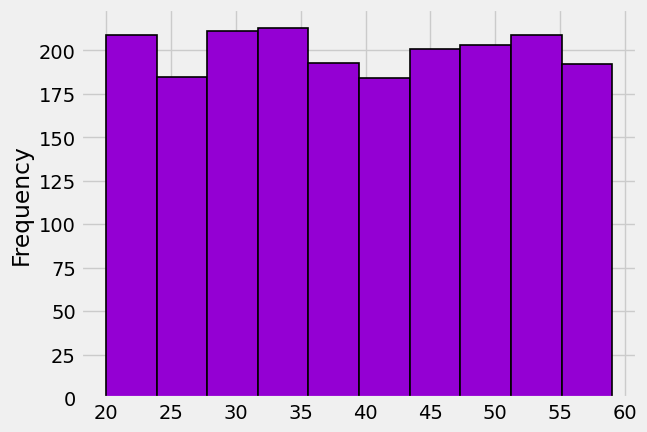

In [12]:
df['Age'].plot(kind='hist', bins=10, color='darkviolet', edgecolor='black', linewidth=1.2)

<AxesSubplot: >

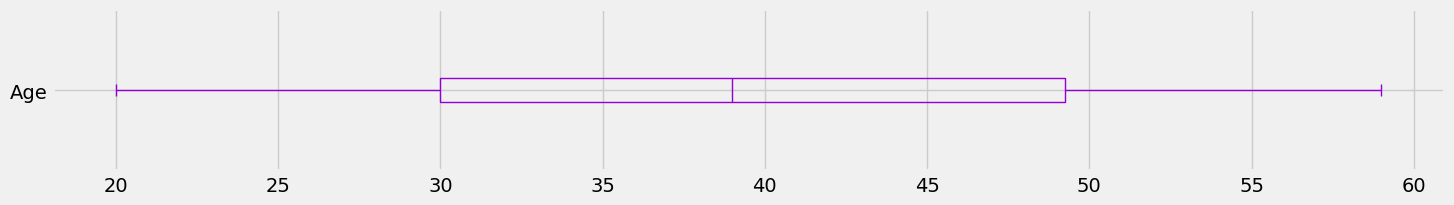

In [14]:
df['Age'].plot(kind='box', vert=False, figsize=(16,2), color='darkviolet')

### 4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?